In [96]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
ticker = "^BVSP"
start = "2015-01-01"
end = "2022-02-11"

In [98]:
dataframe = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [99]:
dataframe.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,49943.0,3621900
2015-01-09,49955.0,49955.0,48501.0,48840.0,48840.0,2999200
2015-01-12,48840.0,48840.0,47956.0,48140.0,48140.0,3246100
2015-01-13,48144.0,48939.0,48042.0,48042.0,48042.0,3881600
2015-01-14,48038.0,48281.0,47372.0,47646.0,47646.0,3697200


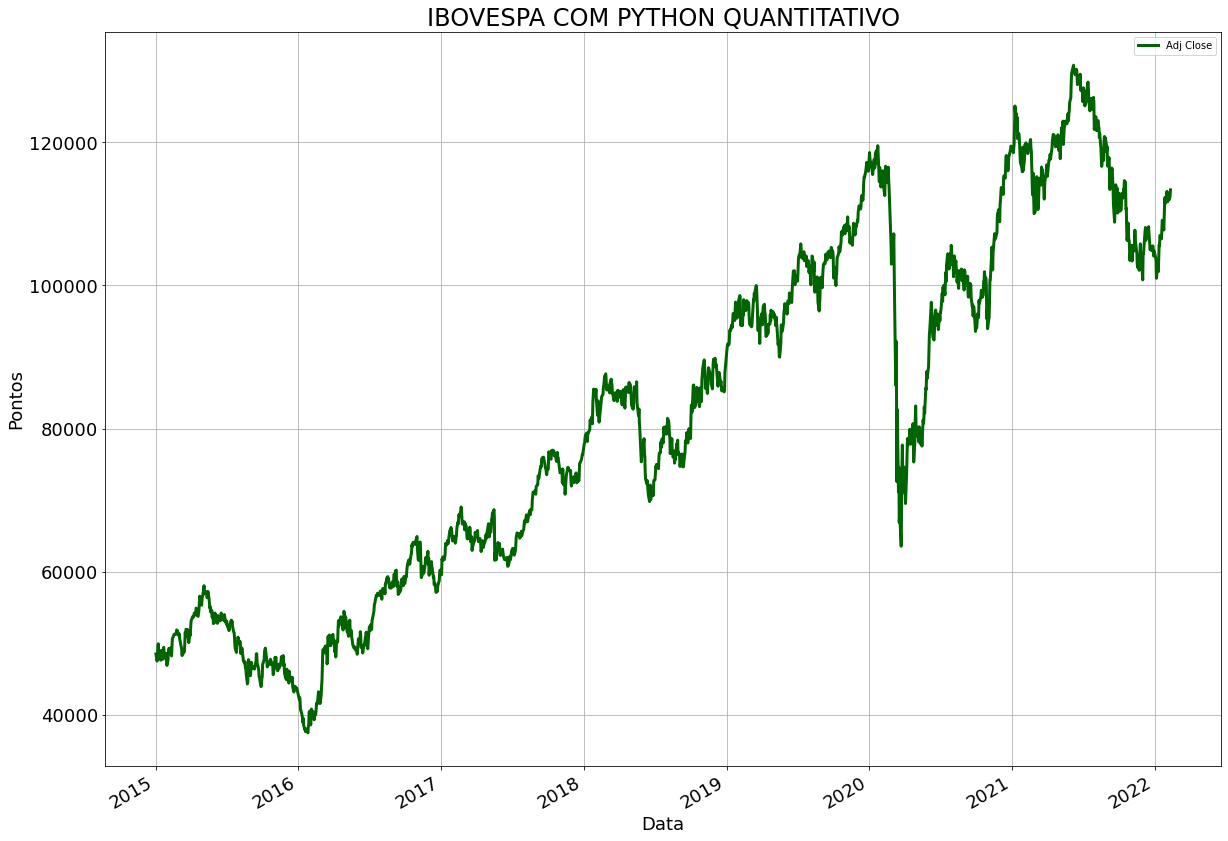

In [100]:
dataframe['Adj Close'].plot(
    grid = True, 
    figsize=(20,15), 
    linewidth = 3, 
    fontsize = 18, 
    color = 'darkgreen'
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()

In [101]:
period = 21
dispersion = 2

dataframe['desvio'] = dataframe['Adj Close'].rolling(period).std()
dataframe['MM'] = dataframe['Adj Close'].rolling(period).mean()
dataframe['Banda_Superior'] = dataframe['MM'] + (dataframe['desvio'] * dispersion)
dataframe['Banda_Inferior'] = dataframe['MM'] - (dataframe['desvio'] * dispersion)

In [102]:
dataframe = dataframe.dropna(axis = 0)

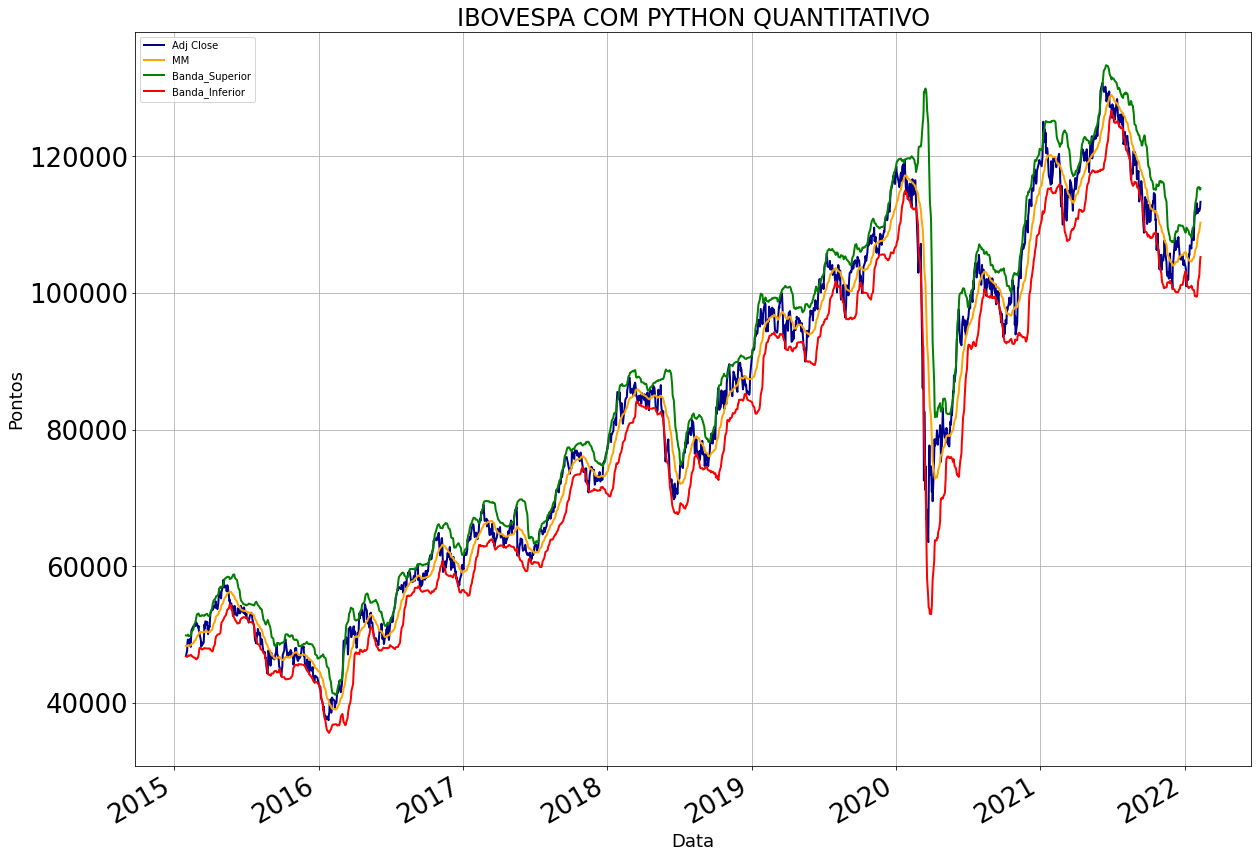

In [103]:
dataframe[['Adj Close', 'MM', 'Banda_Superior', 'Banda_Inferior']].plot(
    grid = True,
    figsize = (20, 15),
    linewidth = 2,
    fontsize = 26,
    color = ['darkblue', 'orange', 'green', 'red']  
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()

In [104]:
# CRIANDO ALVOS

period = 12
dataframe.loc[:, 'Retorno'] = dataframe['Adj Close'].pct_change(period)
dataframe.loc[:, 'Alvo'] = dataframe['Retorno'].shift( - period)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [105]:
# OLHANDO O INICIO E O FIM DO DATASET

dataframe.head()
dataframe.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Superior,Banda_Inferior,Retorno,Alvo
Date,,,,,,,,,,,,
2022-02-04,111696.0,112344.0,110321.0,112330.0,112330.0,0,3454.035196,108588.666667,115496.737058,101680.596275,0.039967,NaN
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800,3229.060823,109042.000000,115500.121646,102583.878354,0.026526,NaN
2022-02-08,111995.0,112251.0,110943.0,112234.0,112234.0,10157500,2857.595239,109531.952381,115247.142858,103816.761904,0.030218,NaN
2022-02-09,112233.0,113163.0,111710.0,112461.0,112461.0,13794500,2600.100796,109945.380952,115145.582544,104745.179361,0.043702,NaN
2022-02-10,112462.0,113812.0,112163.0,113359.0,113359.0,13267900,2509.157068,110310.761905,115329.076040,105292.447769,0.031991,NaN


In [106]:
dataframe = dataframe.dropna(axis = 0)

In [107]:
# ESTRATEGIA DO TRADE - 'Seguir a tentencia'

dataframe.loc[:, 'Regra'] = np.where(
    dataframe.loc[:, 'Adj Close'] > dataframe.loc[: , 'Banda_Superior'], 1, 0
)
dataframe.loc[:, 'Regra'] = np.where(
    dataframe.loc[:, 'Adj Close'] < dataframe.loc[: , 'Banda_Inferior'], -1, dataframe.loc[: ,'Regra']
)

In [108]:
# REGRA NO ALVO

dataframe.loc[:, 'Trade'] = dataframe.loc[:, 'Regra'] * dataframe.loc[:, 'Alvo']

In [109]:
# CALCULANDO RESULTADO ACUMULADO POR JUROS COMPOSTOS

dataframe.loc[:, 'Retorno_Trade'] = dataframe['Trade'].cumsum()

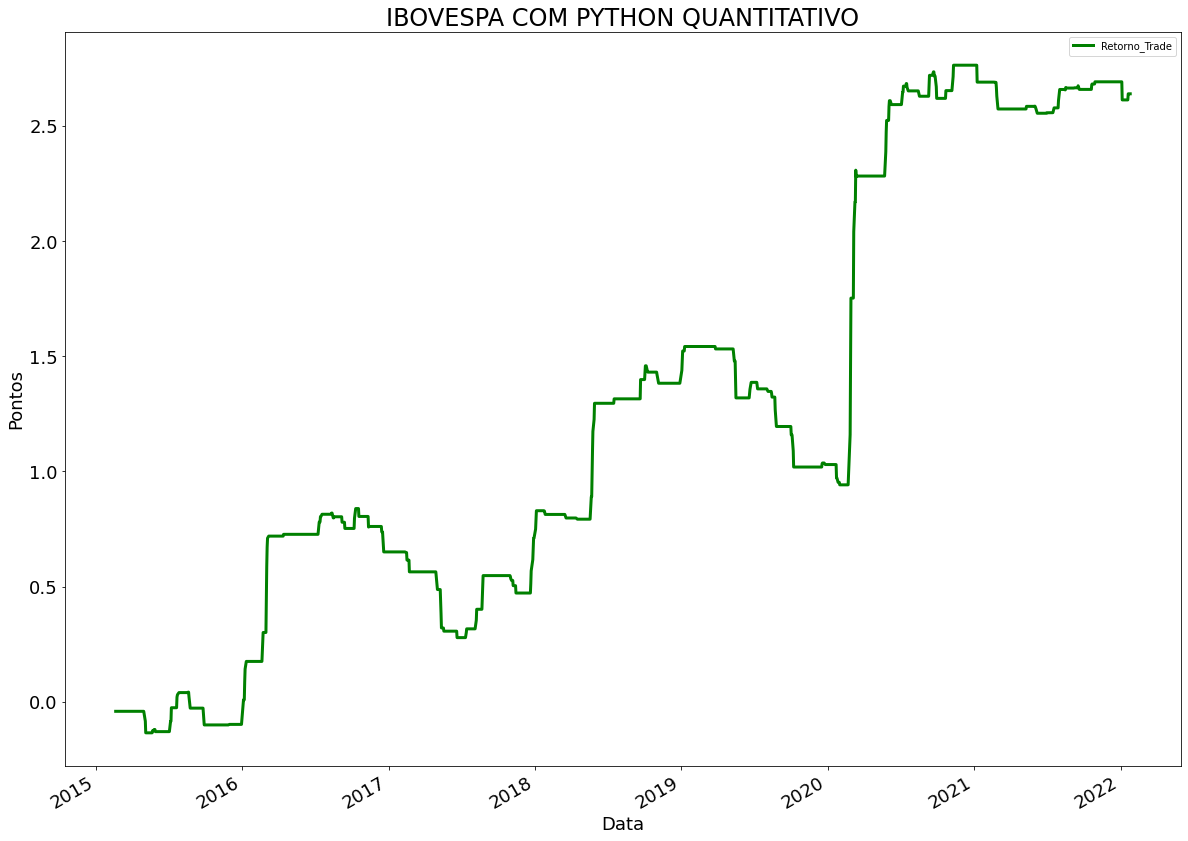

In [110]:
dataframe['Retorno_Trade'].plot(
    figsize = (20,15),
    linewidth = 3,
    fontsize = 18,
    color = 'green'
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()